In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
df=pd.read_csv("E:\Project_2\DATA\cleaned_superstore_train.csv")

# 1. General info 
print(df.info())

# 2. Main statistics about numeric column
print(df.describe())

# 3. Checking Duplicates
duplicates=df.duplicated().sum()
print(f'Duplicated rows: {duplicates}')

# 4. Missing values
missing=df.isnull().sum()
print(f'Missing rows: {missing}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   #              9799 non-null   int64  
 1   row_id         9799 non-null   int64  
 2   order_id       9799 non-null   object 
 3   order_date     9799 non-null   object 
 4   ship_date      9799 non-null   object 
 5   ship_mode      9799 non-null   object 
 6   customer_id    9799 non-null   object 
 7   customer_name  9799 non-null   object 
 8   segment        9799 non-null   object 
 9   country        9799 non-null   object 
 10  city           9799 non-null   object 
 11  state          9799 non-null   object 
 12  postal_code    9788 non-null   float64
 13  region         9799 non-null   object 
 14  product_id     9799 non-null   object 
 15  category       9799 non-null   object 
 16  sub_category   9799 non-null   object 
 17  product_name   9799 non-null   object 
 18  sales   

<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
C:\Users\user\AppData\Local\Temp\ipykernel_19704\1124196879.py:7: SyntaxWarning: invalid escape sequence '\P'
  df=pd.read_csv("E:\Project_2\DATA\cleaned_superstore_train.csv")


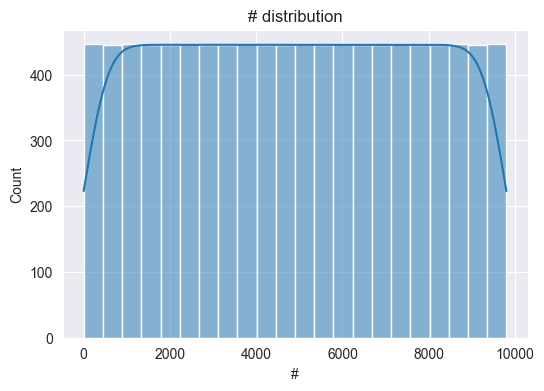

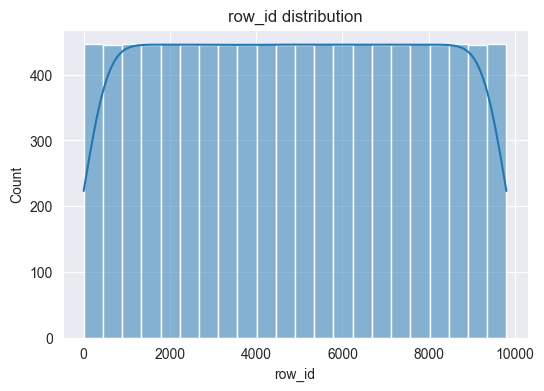

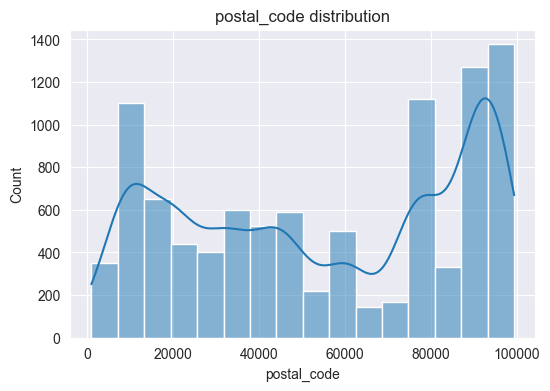

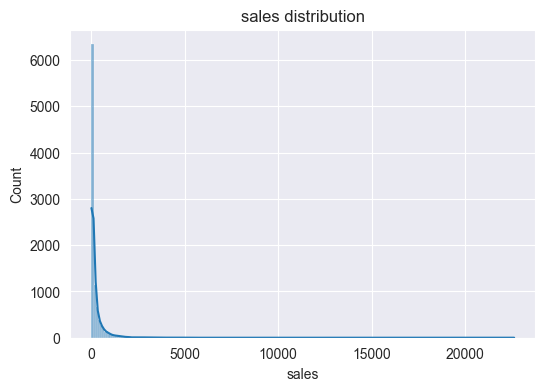

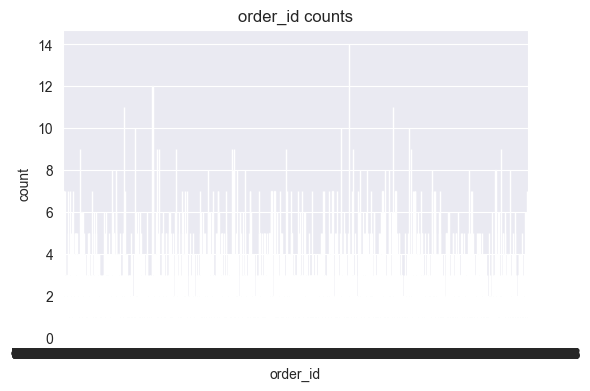

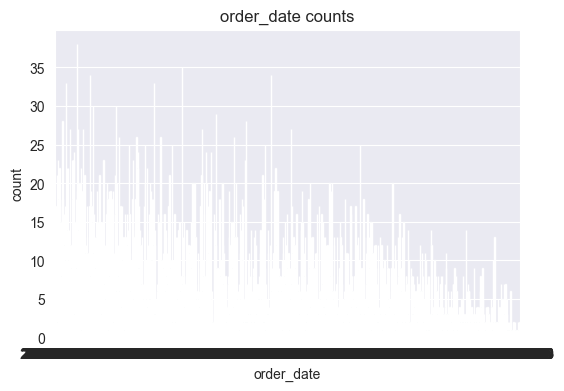

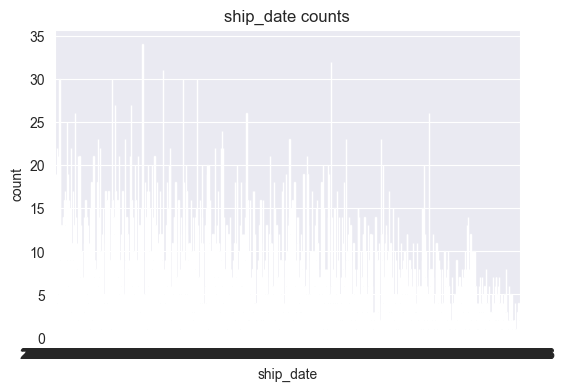

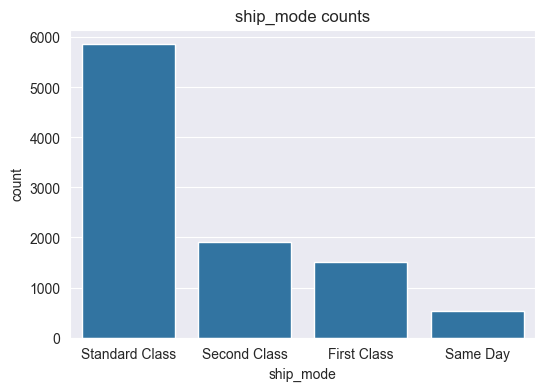

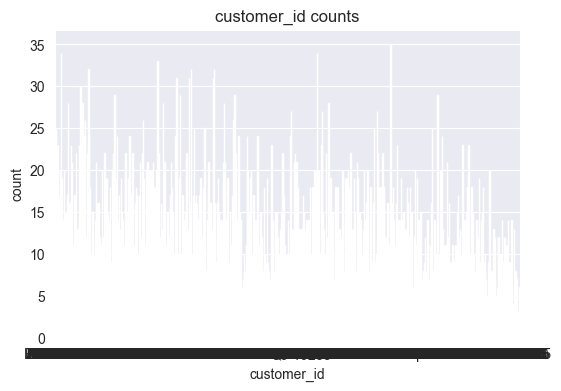

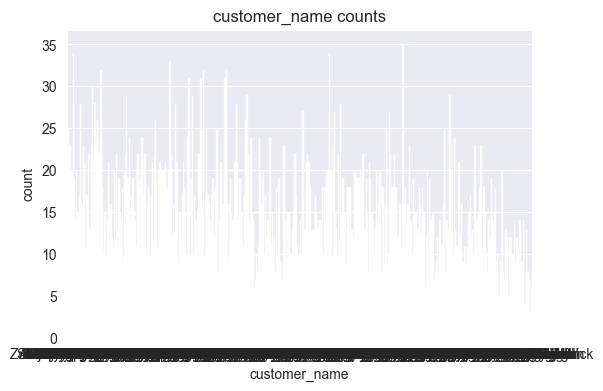

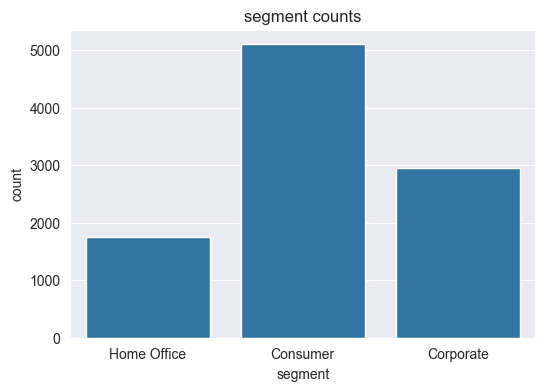

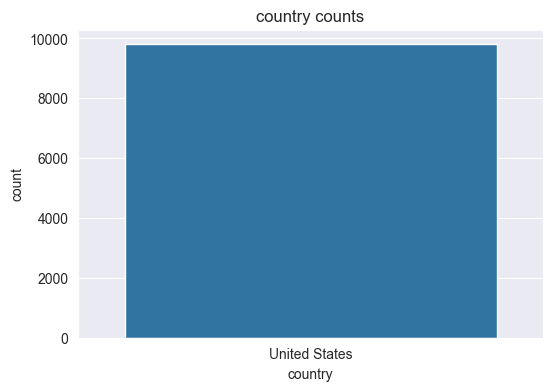

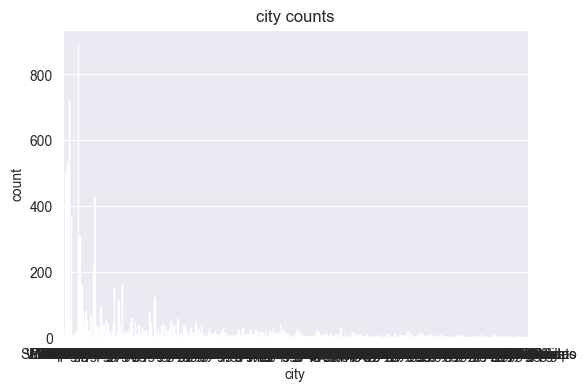

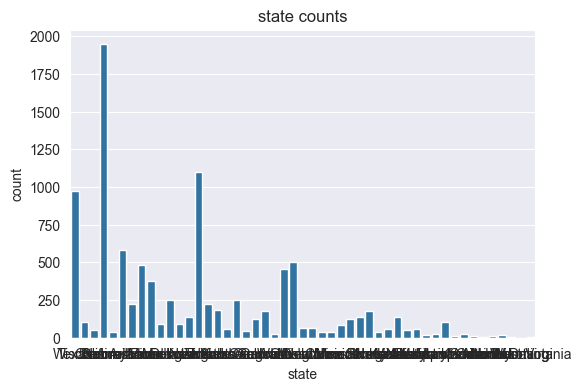

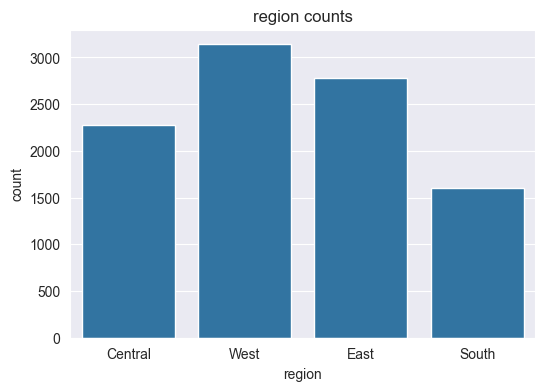

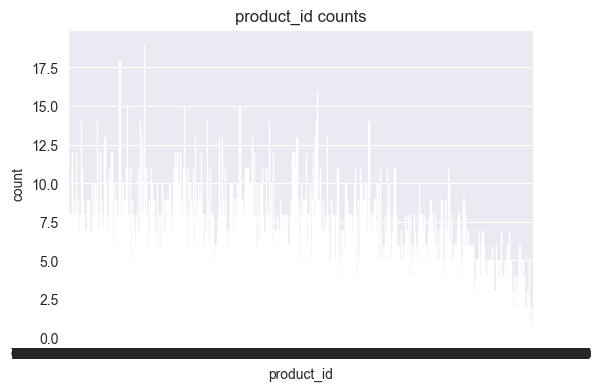

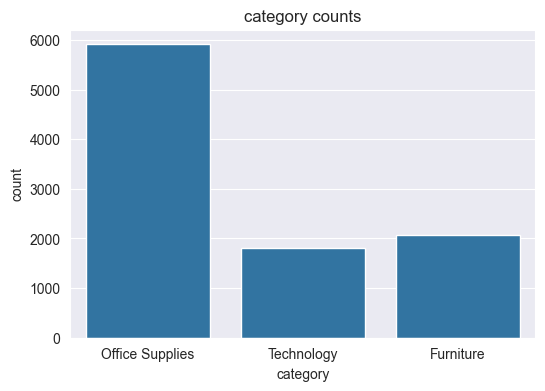

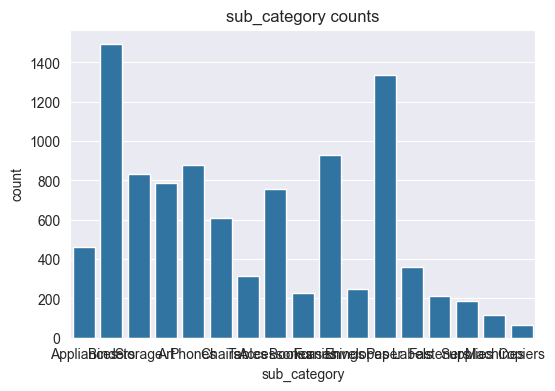

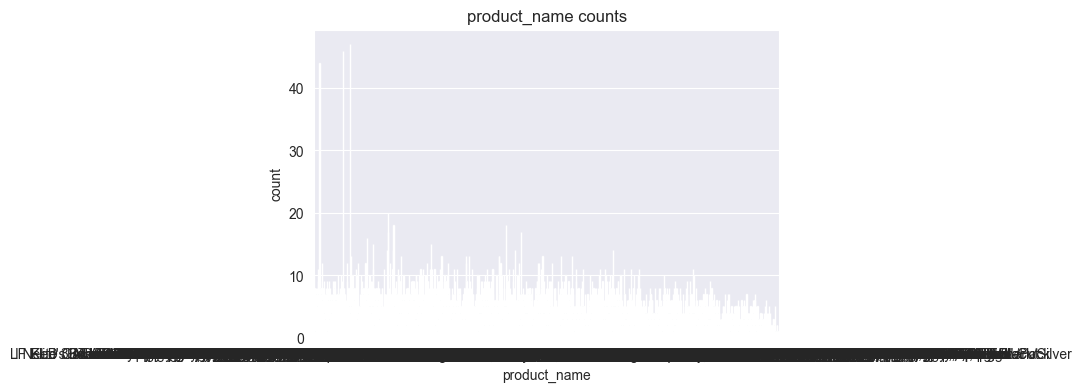

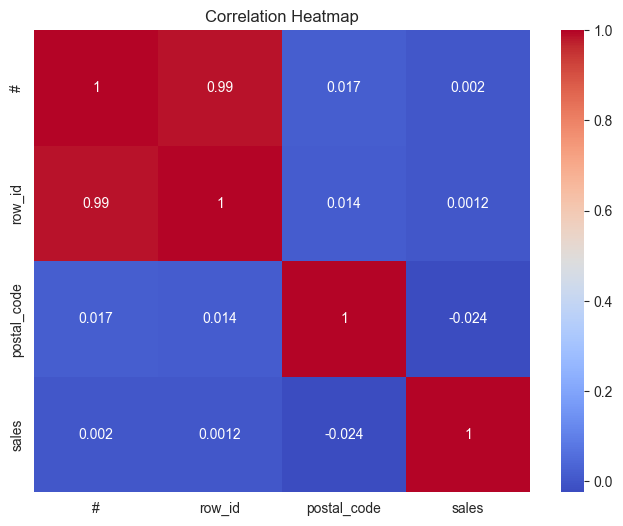

In [2]:
# EDA Insights

# 1. Histogram for numeric columns
numeric_cols=df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} distribution')
    plt.show()

# 2. Counplot for categorical rows
categorical_cols=df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'{col} counts')
    plt.show()

# 3. Correlation heatmap(numeric columns)
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# KPI Metrics

total_sales=df['sales'].sum()
avg_sales_per_customer=df.groupby('customer_id')['sales'].sum().mean()
top_products=df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)

print(f"Total Sales: {total_sales}")
print(f"Avg Sales per Customer: {avg_sales_per_customer}")

Total Sales: 2261255.4107000004
Avg Sales per Customer: 2851.5200639344266
